# Capstone Project: Comment Subtopics Analysis for Airbnb Hosts
---

How can a host on Airbnb understand that are their strengths and weaknesses? How can hosts point out the demand trend of their customers from a large scale of comments? This project focuses on using machine learning tools to help hosts understand the underlying trends of the comments on their property.  

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts" data-toc-modified-id="Capstone-Project:-Comment-Subtopics-Analysis-for-Airbnb-Hosts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone Project: Comment Subtopics Analysis for Airbnb Hosts</a></span></li><li><span><a href="#Data-Selection-&amp;-Cleaning" data-toc-modified-id="Data-Selection-&amp;-Cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Selection &amp; Cleaning</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data:" data-toc-modified-id="Data:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Data:</a></span></li></ul></li><li><span><a href="#Import-The-Most-Recent-Listing-Data" data-toc-modified-id="Import-The-Most-Recent-Listing-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import The Most Recent Listing Data</a></span></li><li><span><a href="#Import-All-Reviews" data-toc-modified-id="Import-All-Reviews-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Import All Reviews</a></span></li><li><span><a href="#Break-Reviews-Down-To-Good-(&gt;80)-and-Bad-(&lt;80)-Overall-Review-Score" data-toc-modified-id="Break-Reviews-Down-To-Good-(>80)-and-Bad-(<80)-Overall-Review-Score-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Break Reviews Down To Good (&gt;80) and Bad (&lt;80) Overall Review Score</a></span></li><li><span><a href="#Use-NLTK-to-Perform-Sentiment-Analysis" data-toc-modified-id="Use-NLTK-to-Perform-Sentiment-Analysis-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Use NLTK to Perform Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#NLTK-Sentiment-Analysis" data-toc-modified-id="NLTK-Sentiment-Analysis-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>NLTK Sentiment Analysis</a></span></li></ul></li><li><span><a href="#Review-Sentiment-Dataframe-EDA" data-toc-modified-id="Review-Sentiment-Dataframe-EDA-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Review Sentiment Dataframe EDA</a></span></li></ul></li></ul></div>

---

# Data Selection & Cleaning

---
### Data: 
The data for this project is collected from Inside Airbnb. [Inside Airbnb](http://insideairbnb.com/about.html) is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world. For the purpose of this project, I will be using the dataset Inside Airbnb put out for San Francisco regarding on the listing information and comments. 

All Libraries Used

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import time
from langdetect import detect #language detection 

now = time.time()

## Import The Most Recent Listing Data 

---

In [43]:
listing = pd.read_csv('../data/listings/2019-03-06_data_listings.csv')

In [44]:
listing.shape

(7151, 106)

In [45]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.93
2,7918,https://www.airbnb.com/rooms/7918,20190306152813,2019-03-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190306152813,2019-03-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190306152813,2019-03-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.23


In [54]:
#Extract all review information for analysis purpose 
review_df = listing[['id', 'last_scraped', 'review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 
             'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']]

In [55]:
review_df.head()

,id,last_scraped,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
0,958,2019-03-06,10.0,10.0,10.0,10.0,10.0,97.0,10.0
1,5858,2019-03-06,10.0,10.0,10.0,10.0,10.0,98.0,9.0
2,7918,2019-03-06,8.0,9.0,8.0,9.0,9.0,85.0,8.0
3,8142,2019-03-06,9.0,10.0,9.0,10.0,9.0,93.0,9.0
4,8339,2019-03-06,10.0,10.0,10.0,10.0,10.0,97.0,9.0


In [56]:
review_df = review_df.sort_values(by = ['id'])

In [57]:
review_df.reset_index(drop = True, inplace= True)

In [58]:
review_df.head()

,id,last_scraped,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
0,958,2019-03-06,10.0,10.0,10.0,10.0,10.0,97.0,10.0
1,5858,2019-03-06,10.0,10.0,10.0,10.0,10.0,98.0,9.0
2,7918,2019-03-06,8.0,9.0,8.0,9.0,9.0,85.0,8.0
3,8142,2019-03-06,9.0,10.0,9.0,10.0,9.0,93.0,9.0
4,8339,2019-03-06,10.0,10.0,10.0,10.0,10.0,97.0,9.0


In [59]:
review_df.dtypes

id                               int64
last_scraped                    object
review_scores_accuracy         float64
review_scores_checkin          float64
review_scores_cleanliness      float64
review_scores_communication    float64
review_scores_location         float64
review_scores_rating           float64
review_scores_value            float64
dtype: object

In [60]:
review_df.isnull().sum()

id                                0
last_scraped                      0
review_scores_accuracy         1425
review_scores_checkin          1427
review_scores_cleanliness      1424
review_scores_communication    1423
review_scores_location         1427
review_scores_rating           1421
review_scores_value            1428
dtype: int64

In [61]:
#Since all the NA means there is no reivews, I will fill all the NA's with 0 
review_df.fillna(0, inplace = True)

In [62]:
review_df.isnull().sum()

id                             0
last_scraped                   0
review_scores_accuracy         0
review_scores_checkin          0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_rating           0
review_scores_value            0
dtype: int64

In [63]:
#save the dataframe to csv 
review_df.to_csv('../data/reviewsscore2019.csv')

## Import All Reviews 
---

In [17]:
reviews = pd.read_csv('../data/reviews/2019-03-06_data_reviews.csv')

In [18]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


In [19]:
reviews.shape

(311277, 6)

In [20]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     1
comments         79
dtype: int64

In [21]:
#look at the rows with not comments 
reviews[reviews['comments'].isnull()].head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
9989,63405,369208104,2019-01-09,64031749,Conor,NaN
29324,377569,404349422,2019-01-23,233758492,Branden,NaN
30591,423063,338134411,2018-10-18,25368593,Veronica,NaN
45406,719431,233055588,2018-02-07,166605374,Otto,NaN
65390,1206184,154689490,2017-05-25,131728793,Werner,NaN


In [22]:
#Review clean up function 
def review_cleanup(df, reviews):
    '''
    This function will clean up reviews with no content, emoji, and languages that are not english will not be included
    the output of the function will be a clean dataframe with english only comments. 
    Note: This function will take some time to run if there is a lot of comments 
    '''
    # Drop NA 
    df = df.dropna()
    
    #Exclude comments with lenth less than 10 
    textlang = [detect(comment) if len(comment) > 10 else comment == 'bonju' for comment in df[reviews]]
    
    #add new variable to dataframe 
    df['language'] = textlang
    
    #dataframe filter 
    df = df[df['language'] == 'en']
    
    return df

In [90]:
%%time
#run the function: 
english_reveiw = review_cleanup(df = reviews, reviews= 'comments')

CPU times: user 20min 47s, sys: 1min 11s, total: 21min 58s
Wall time: 22min 19s


/Users/evelyn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
english_review.to_csv('../data/english_comments_only.csv')

## Break Reviews Down To Good (>80) and Bad (<80) Overall Review Score 
---

In [77]:
english_review = pd.read_csv('../data/english_comments_only.csv', index_col = 0)

In [78]:
english_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en


In [79]:
review_df[['id','review_scores_rating']].head()

,id,review_scores_rating
0,958,97.0
1,5858,98.0
2,7918,85.0
3,8142,93.0
4,8339,97.0


In [80]:
#build a id_score dictionary 
score_dict = {}
for i, score in zip(review_df['id'],review_df['review_scores_rating']):
    score_dict[i] = score

In [81]:
#map dictoinary to english_reviews 
english_review['overall_rating'] = english_review['listing_id'].map(score_dict)

In [82]:
english_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0


## Use NLTK to Perform Sentiment Analysis 
---

### NLTK Sentiment Analysis

---

In [83]:
english_review.shape

(289517, 8)

In [84]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [85]:
%%time
sid = SentimentIntensityAnalyzer()
reviews_dic = []
for review in english_review['comments']:
    ss = sid.polarity_scores(review)
    reviews_dic.append(ss)

CPU times: user 2min 41s, sys: 654 ms, total: 2min 42s
Wall time: 2min 42s


In [86]:
nltk_sentiment = pd.DataFrame(reviews_dic)

In [87]:
nltk_sentiment.shape

(289517, 4)

In [88]:
review_sentiment_df = english_review.merge(nltk_sentiment, left_on = english_review.index, right_on = nltk_sentiment.index)

In [89]:
review_sentiment_df.to_csv('../data/reviews_sentiment_score.csv')

## Review Sentiment Dataframe EDA 
---

In [2]:
review_sentiment_df = pd.read_csv('../data/reviews_sentiment_score.csv', index_col = 0)

In [3]:
review_sentiment_df.head()

,key_0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,overall_rating,compound,neg,neu,pos
0,0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",en,97.0,0.9590,0.000,0.788,0.212
1,1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,en,97.0,0.9819,0.000,0.697,0.303
2,2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,en,97.0,0.7600,0.134,0.710,0.156
3,3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,en,97.0,0.9840,0.035,0.646,0.319
4,4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,en,97.0,0.9617,0.000,0.613,0.387


In [4]:
review_sentiment_df.isnull().sum()

key_0             0
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments          0
language          0
overall_rating    0
compound          0
neg               0
neu               0
pos               0
dtype: int64

In [5]:
review_sentiment_df[review_sentiment_df["compound"]> 0].shape

(263286, 13)

In [6]:
review_sentiment_df[review_sentiment_df["neg"] > 0.5]['comments']

44780     I have nothing but wonderful things to say abo...
71669     This was our first experience of Airbnb and it...
90944     Chris and his wife were very quick to respond ...
109641    It was just wonderful. The place is lovely and...
123875    Leslie's space is perfect, very comfortable be...
154383    Very nice and clean place to stay. Enough park...
159944    We love staying at Brendan's home! It is perfe...
166240           Great apartment!  Windy is excellent host.
171977    Abby's place was exactly how I looked in the p...
184862    The place is pretty small. You do get a desk, ...
196345    Teo was a fantastic host, so warm and friendly...
212994    Great quaint accommodation in San Fran. Thanks...
216334    The place was very comfortable and had everyth...
256706    Only the cleanliness needs to be improve, ever...
259569    Ken and Joe's place is truly a beautiful oasis...
265992    Very very clean place. Keisha is a very kind p...
268448    everything was excellent! \nIt

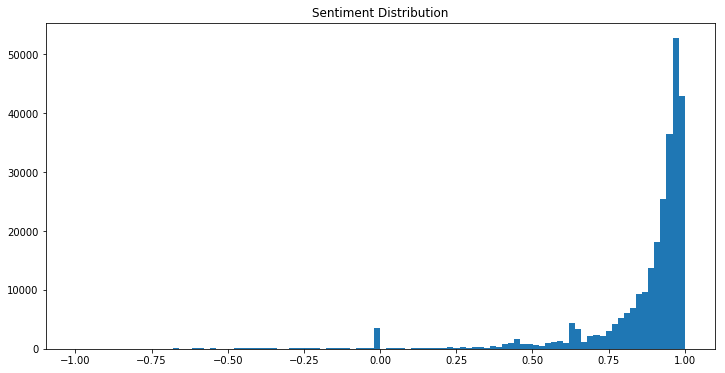

In [7]:
plt.figure(figsize = (12,6))
plt.hist(review_sentiment_df['compound'], bins = 100)
plt.title("Sentiment Distribution");

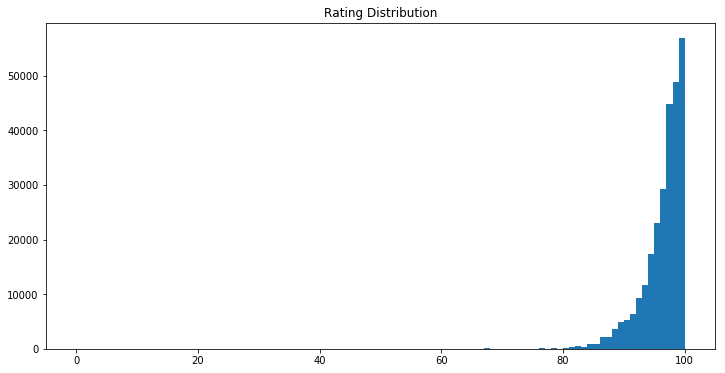

In [8]:
plt.figure(figsize = (12,6))
plt.hist(review_sentiment_df['overall_rating'], bins = 100)
plt.title("Rating Distribution");